# EcoHome Energy Advisor - Agent Run & Evaluation

In this notebook, you'll run the Energy Advisor agent with various real-world scenarios and see how it helps customers optimize their energy usage.

## Learning Objectives
- Create the agent's instructions
- Run the Energy Advisor with different types of questions
- Evaluate response quality and accuracy
- Measure tool usage effectiveness
- Identify areas for improvement
- Implement evaluation metrics

## Evaluation Criteria
- **Accuracy**: Correct information and calculations
- **Relevance**: Responses address the user's question
- **Completeness**: Comprehensive answers with actionable advice
- **Tool Usage**: Appropriate use of available tools
- **Reasoning**: Clear explanation of recommendations


## 1. Import and Initialize

In [1]:
from datetime import datetime
from agent import Agent
from rich.pretty import Pretty

In [2]:
## Create the agent's instructions

ECOHOME_SYSTEM_PROMPT = """
You are EcoHome Energy Advisor, an intelligent agent capable of optimizing energy usage across multiple smart home devices and systems.
Your goal is to answer questions regarding optimizing energy consumption and/or come up with personalized recommendations.

Guidelines:
- Rely on tool usage rather than own thinking or guessing
- Work data-driven and use them in your answer for reasoning
- Make clear reommendations by naming temperature ranges/hours/durations and so on rather than giving vague answers
- If possible estimate savings either as energy (kwh) or money (USD/EUR/...)
- Be honest, if you cannot solve a problem just say so and do not try to make something up
"""

In [3]:
ecohome_agent = Agent(
    instructions=ECOHOME_SYSTEM_PROMPT,
)

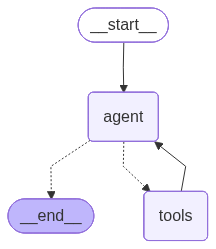

In [4]:
ecohome_agent.graph

In [5]:
response = ecohome_agent.invoke(
    question="When should I charge my electric car tomorrow to minimize cost and maximize solar power?",
    context=f"Location: San Francisco; Time: {datetime.now()}"
)
response

{'messages': [SystemMessage(content='Location: San Francisco; Time: 2025-12-30 01:49:04.253236', additional_kwargs={}, response_metadata={}, id='d137d869-33e6-4c50-b60e-ffaa80f092ac'),
  HumanMessage(content='When should I charge my electric car tomorrow to minimize cost and maximize solar power?', additional_kwargs={}, response_metadata={}, id='d7b1dd1f-6d21-47b9-83e1-dd13db0c76b8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_U1XHsRnLqQPO6unZ9IuOjGpK', 'function': {'arguments': '{"date": "2025-12-31"}', 'name': 'get_electricity_prices'}, 'type': 'function'}, {'id': 'call_CoHCPLZ9W7r2GRqTrJLZVYxT', 'function': {'arguments': '{"start_date": "2025-12-31", "end_date": "2025-12-31"}', 'name': 'query_solar_generation'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 70, 'prompt_tokens': 1257, 'total_tokens': 1327, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 

In [6]:
print(response["messages"][-1].content)

For December 31, 2025, here are the electricity prices and solar generation insights:

### Electricity Prices:
- **Off-Peak Rates (0.15 USD/kWh)**: 
  - 00:00 - 05:00
  - 22:00 - 23:59
- **Peak Rates (0.18 USD/kWh)**: 
  - 06:00 - 21:59

### Solar Generation:
- There is no solar generation expected for December 31, 2025, which means you won't be able to charge your electric car using solar power on that day.

### Recommendations:
1. **Charge During Off-Peak Hours**: Since there is no solar generation, you should charge your electric car during the off-peak hours to minimize costs:
   - **Best Times to Charge**: 
     - From **00:00 to 05:00** 
     - From **22:00 to 23:59**

By charging during these times, you will pay the lower rate of **0.15 USD/kWh**.


In [7]:
print("TOOLS:")
for msg in response["messages"]:
    obj = msg.model_dump()
    if obj.get("tool_call_id"):
        print("-", msg.name)

TOOLS:
- get_electricity_prices
- query_solar_generation


## 2. Define Test Cases

In [8]:
# Define comprehensive test cases for the Energy Advisor
# Create 10 test cases covering different scenarios:
# - EV charging optimization
# - Thermostat settings
# - Appliance scheduling
# - Solar power maximization
# - Cost savings calculations

In [9]:
test_cases = [
    {
        "id": "ev_charging_1",
        "question": "When should I charge my electric car tomorrow to minimize cost and maximize solar power?",
        "expected_tools": ["get_weather_forecast", "get_electricity_prices"],
        "expected_response": "The response should contain time recommendation, cost analysis and solar consideration",
    },
    {
        "id": "energy_tips_8",
        "question": "Can you suggest three practical ways to lower my household electricity consumption?",
        "expected_tools": ["search_energy_tips"],
        "expected_response": "Should provide three concrete, tailored recommendations to improve efficiency."
    },
    {
        "id": "laundry_4",
        "question": "What’s the cheapest time to run my washing machine over the weekend?",
        "expected_tools": ["get_electricity_prices"],
        "expected_response": "Should recognize weekend rate patterns and point out the lowest-cost hours."
    },
    {
        "id": "thermostat_2",
        "question": "To cut costs, what thermostat setting makes sense for Wednesday afternoon?",
        "expected_tools": ["get_electricity_prices", "get_weather_forecast"],
        "expected_response": "Should recommend a numeric temperature range and justify it using price and weather data."
    },
    {
        "id": "usage_history_6",
        "question": "Which device consumed the most power in the previous month?",
        "expected_tools": ["query_energy_usage"],
        "expected_response": "Should name the top-consuming appliance and include kWh usage and cost details."
    },
    {
        "id": "dishwasher_3",
        "question": "What kind of savings could I see if I run my dishwasher overnight instead of around 6 PM?",
        "expected_tools": ["get_electricity_prices", "calculate_energy_savings"],
        "expected_response": "Should approximate savings per run and per month based on TOU price differences."
    },
    {
        "id": "recent_summary_9",
        "question": "Can you give me a quick overview of my electricity use during the last 48 hours?",
        "expected_tools": ["get_recent_energy_summary"],
        "expected_response": "Should include total kWh, total cost, a device-level breakdown, and brief insights."
    },
    {
        "id": "solar_forecast_5",
        "question": "How much solar power is likely to be generated tomorrow in San Francisco?",
        "expected_tools": ["get_weather_forecast"],
        "expected_response": "Should mention expected sunshine, irradiance, or typical generation trends."
    },
    {
        "id": "optimization_multi_device_7",
        "question": "Can you plan the optimal run times for my EV, dishwasher, and dryer tomorrow to minimize costs?",
        "expected_tools": ["get_electricity_prices", "get_weather_forecast"],
        "expected_response": "Should suggest a coordinated schedule that avoids peak pricing."
    },
    {
        "id": "pool_pump_10",
        "question": "When should I operate my pool pump over the coming week for best efficiency and cost?",
        "expected_tools": ["get_weather_forecast", "get_electricity_prices"],
        "expected_response": "Should outline a day-by-day schedule that balances sunlight availability with off-peak rates."
    }
]

if len(test_cases) < 10:
    raise ValueError("You MUST have at least 10 test cases")

## 3. Run Agent Tests

In [10]:
CONTEXT = f"Location: San Francisco; Time: {datetime.now()}"

In [11]:
# Run the agent tests
# For each test case, call the agent and collect the response
# Store results for evaluation

print("=== Running Agent Tests ===")
test_results = []

for i, test_case in enumerate(test_cases):
    print(f"\nTest {i+1}: {test_case['id']}")
    print(f"Question: {test_case['question']}")
    print("-" * 50)
    
    try:
        # Call the agent
        response = ecohome_agent.invoke(
            question=test_case['question'],
            context=CONTEXT
        )
        
        # Store the result
        result = {
            'test_id': test_case['id'],
            'question': test_case['question'],
            'response': response,
            'expected_tools': test_case['expected_tools'],
            'expected_response': test_case['expected_response'],
            'timestamp': datetime.now().isoformat()
        }
        test_results.append(result)
                
    except Exception as e:
        print(f"Error: {e}")
        result = {
            'test_id': test_case['id'],
            'question': test_case['question'],
            'response': f"Error: {str(e)}",
            'expected_tools': test_case['expected_tools'],
            'expected_response': test_case['expected_response'],
            'timestamp': datetime.now().isoformat(),
            'error': str(e)
        }
        test_results.append(result)

print(f"\nCompleted {len(test_results)} tests")


=== Running Agent Tests ===

Test 1: ev_charging_1
Question: When should I charge my electric car tomorrow to minimize cost and maximize solar power?
--------------------------------------------------

Test 2: energy_tips_8
Question: Can you suggest three practical ways to lower my household electricity consumption?
--------------------------------------------------

Test 3: laundry_4
Question: What’s the cheapest time to run my washing machine over the weekend?
--------------------------------------------------

Test 4: thermostat_2
Question: To cut costs, what thermostat setting makes sense for Wednesday afternoon?
--------------------------------------------------

Test 5: usage_history_6
Question: Which device consumed the most power in the previous month?
--------------------------------------------------

Test 6: dishwasher_3
Question: What kind of savings could I see if I run my dishwasher overnight instead of around 6 PM?
--------------------------------------------------

Test

## 4. Evaluate Responses

In [12]:
# Implement evaluation functions
# Create functions to evaluate:
# - Final Response
# - Tool usage

In [13]:
from openai import AsyncOpenAI
from ragas.llms import llm_factory
from ragas.metrics.collections import ContextRelevance, AnswerAccuracy
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI


class JudgeResult(BaseModel):
    score: float = Field(ge=0.0, le=1.0)
    reason: str

def accuracy_rubric(expected_response: str) -> str:
    return (
        "Judge whether the answer is factually correct.\n"
        "- All stated facts are correct\n"
        "- No made-up numbers, prices, or claims\n"
        "- Reasoning is logically consistent\n\n"
        f"Expected facts (if any):\n{expected_response}"
    )

def relevance_rubric(expected_response: str) -> str:
    return (
        "Judge whether the answer directly addresses the question.\n"
        "- Focuses on the user's question\n"
        "- Avoids unnecessary or off-topic information\n"
        "- Does not answer a different question\n\n"
        f"Task expectation:\n{expected_response}"
    )


def usefulness_rubric(expected_response: str) -> str:
    return (
        "Judge whether the answer is helpful and actionable.\n"
        "- Gives concrete, usable information\n"
        "- Explains reasoning\n"
        "- Avoids unsupported assumptions\n\n"
        f"Task expectation:\n{expected_response}"
    )

def completeness_rubric(expected_response: str) -> str:
    return (
        "Judge whether ALL required aspects are covered.\n"
        "Missing any required part reduces the score.\n\n"
        f"Requirements:\n{expected_response}"
    )


async def evaluate_response(question, messages, expected_response):

    final_response=messages[-1].content
    #retrivals = [m.content for m in messages if m.model_dump().get("tool_call_id")]

    # Setup LLM
    client = AsyncOpenAI()
    llm = llm_factory("gpt-4o-mini", client=client)

    async def evaluate_nvidia_accuracy(question, final_response, expected_response):
        scorer = AnswerAccuracy(llm=llm)
        result = await scorer.ascore(
            user_input=question,
            response=final_response,
            reference=expected_response
        )
        return result.value

    async def evaluate_nvidia_context_relevance(question, final_response):
        scorer = ContextRelevance(llm=llm)
        result = await scorer.ascore(
            user_input=question,
            retrieved_contexts=[final_response]
        )
        return result.value
    
    judge_llm = ChatOpenAI(
        model="gpt-4o-mini",
        temperature=0.0,
    ).with_structured_output(JudgeResult)

    async def judge_metric(
        metric_name: str,
        question: str,
        response: str,
        rubric: str
    ):
        prompt = f"""
            Metric: {metric_name}

            Question:
            {question}

            Assistant response:
            {response}

            Rubric:
            {rubric}

            Score strictly between 0 and 1.
        """

        result: JudgeResult = await judge_llm.ainvoke(prompt)
        return result.model_dump()


    return {
        "ragas_metrics": {
            "nvidia_accuracy": await evaluate_nvidia_accuracy(question, final_response, expected_response),
            "nvidia_context_relevance": await evaluate_nvidia_context_relevance(question, final_response),
        },
        "llm_judge": {
            "accuracy": await judge_metric(
            metric_name="accuracy",
            question=question,
            response=final_response,
            rubric=accuracy_rubric(expected_response)
            ),
            "relevance": await judge_metric(
                metric_name="relevance",
                question=question,
                response=final_response,
                rubric=relevance_rubric(expected_response)
            ),
            "usefulness": await judge_metric(
                metric_name="usefulness",
                question=question,
                response=final_response,
                rubric=usefulness_rubric(expected_response)
            ),
            "completeness": await judge_metric(
                metric_name="completeness",
                question=question,
                response=final_response,
                rubric=completeness_rubric(expected_response)
            )
        }
    }

In [17]:
# Create a tool udage evaluator
def evaluate_tool_usage(messages, expected_tools):
    """Evaluate if the right tools were used"""
    tools_called = [m.name for m in messages if m.model_dump().get("tool_call_id")]
    correctly_called_tools = [t for t in tools_called if t in expected_tools]

    return {
        "appropriateness": len(correctly_called_tools) / len(tools_called),
        "completeness": len(correctly_called_tools) / len(expected_tools),
        "expected_tools": expected_tools,
        "tools_called": tools_called
    }


In [18]:
test_result = test_results[-5]

Pretty(await evaluate_response(
    question=test_result["question"],
    messages=test_result["response"]["messages"],
    expected_response=test_result["expected_response"]
))

{
    'ragas_metrics': {'nvidia_accuracy': 0.0, 'nvidia_context_relevance': 1.0},
    'llm_judge': {
        'accuracy': {
            'score': 0.9,
            'reason': 'The response provides accurate information regarding peak and off-peak electricity rates and
typical dishwasher energy consumption. The calculations for cost comparison and potential savings are correct. 
However, the assistant could improve by providing a more detailed breakdown of monthly savings based on the 
frequency of dishwasher use.'
        },
        'relevance': {
            'score': 0.8,
            'reason': "The response directly addresses the user's question about potential savings by comparing 
costs of running the dishwasher during peak and off-peak hours. It provides a clear calculation of savings per 
cycle, which is relevant. However, it could improve by providing a monthly savings estimate based on a typical 
number of cycles per week."
        },
        'usefulness': {
            'score': 0.8,
            'reason': 'The response provides a clear comparison of costs between running the dishwasher during peak
and off-peak hours, along with a concrete savings estimate per cycle. It explains the reasoning behind the 
calculations and offers a general idea of potential savings. However, it could be improved by providing a monthly 
savings estimate based on a typical number of cycles per week.'
        },
        'completeness': {
            'score': 0.8,
            'reason': 'The response provides a clear comparison of costs for running the dishwasher during peak and
off-peak hours, along with potential savings per cycle. However, it lacks a monthly savings estimate based on the 
frequency of use, which is a required aspect.'
        }
    }
}

In [19]:
Pretty(evaluate_tool_usage(
    test_result["response"]["messages"],
    test_result["expected_tools"]
))

{
    'appropriateness': 0.5,
    'completeness': 0.5,
    'expected_tools': ['get_electricity_prices', 'calculate_energy_savings'],
    'tools_called': ['get_electricity_prices', 'query_energy_usage']
}

In [21]:
test_results

[{'test_id': 'ev_charging_1',
  'question': 'When should I charge my electric car tomorrow to minimize cost and maximize solar power?',
  'response': {'messages': [SystemMessage(content='Location: San Francisco; Time: 2025-12-30 01:49:27.332427', additional_kwargs={}, response_metadata={}, id='80b2dc83-6023-41d2-a9ba-30e7a41ac743'),
    HumanMessage(content='When should I charge my electric car tomorrow to minimize cost and maximize solar power?', additional_kwargs={}, response_metadata={}, id='e3002f16-ef07-4bb8-9636-7fa1358a3400'),
    AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_YHRmJoTiEFf0JmjsO7P7bG8v', 'function': {'arguments': '{"location": "San Francisco", "days": 1}', 'name': 'get_weather_forecast'}, 'type': 'function'}, {'id': 'call_IEfDDs3A17x1ojJmMDJMlfNJ', 'function': {'arguments': '{"date": "2025-12-31"}', 'name': 'get_electricity_prices'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_t

In [22]:
# Generate a comprehensive evaluation report
# Calculate overall scores and metrics
# Identify strengths and weaknesses
# Provide recommendations for improvement

import pandas as pd

async def generate_evaluation_report():
    for test_result in test_results:
        test_result["evaluation"] = {
            "tool_usage": evaluate_tool_usage(
                test_result["response"]["messages"],
                test_result["expected_tools"]
            ),
            "response": await evaluate_response(
                question=test_result["question"],
                messages=test_result["response"]["messages"],
                expected_response=test_result["expected_response"]
            )
        }

    return test_results


results = await generate_evaluation_report()

In [23]:
pd.DataFrame(results)

,test_id,question,response,expected_tools,expected_response,timestamp,evaluation
0,ev_charging_1,When should I charge my electric car tomorrow ...,{'messages': [content='Location: San Francisco...,"[get_weather_forecast, get_electricity_prices]",The response should contain time recommendatio...,2025-12-30T01:49:37.028423,"{'tool_usage': {'appropriateness': 1.0, 'compl..."
1,energy_tips_8,Can you suggest three practical ways to lower ...,{'messages': [content='Location: San Francisco...,[search_energy_tips],"Should provide three concrete, tailored recomm...",2025-12-30T01:49:44.799045,"{'tool_usage': {'appropriateness': 1.0, 'compl..."
2,laundry_4,What’s the cheapest time to run my washing mac...,{'messages': [content='Location: San Francisco...,[get_electricity_prices],Should recognize weekend rate patterns and poi...,2025-12-30T01:49:49.208738,"{'tool_usage': {'appropriateness': 1.0, 'compl..."
3,thermostat_2,"To cut costs, what thermostat setting makes se...",{'messages': [content='Location: San Francisco...,"[get_electricity_prices, get_weather_forecast]",Should recommend a numeric temperature range a...,2025-12-30T01:49:57.662922,"{'tool_usage': {'appropriateness': 1.0, 'compl..."
4,usage_history_6,Which device consumed the most power in the pr...,{'messages': [content='Location: San Francisco...,[query_energy_usage],Should name the top-consuming appliance and in...,2025-12-30T01:50:02.471292,"{'tool_usage': {'appropriateness': 1.0, 'compl..."
5,dishwasher_3,What kind of savings could I see if I run my d...,{'messages': [content='Location: San Francisco...,"[get_electricity_prices, calculate_energy_savi...",Should approximate savings per run and per mon...,2025-12-30T01:50:07.308125,"{'tool_usage': {'appropriateness': 0.5, 'compl..."
6,recent_summary_9,Can you give me a quick overview of my electri...,{'messages': [content='Location: San Francisco...,[get_recent_energy_summary],"Should include total kWh, total cost, a device...",2025-12-30T01:50:09.769025,"{'tool_usage': {'appropriateness': 1.0, 'compl..."
7,solar_forecast_5,How much solar power is likely to be generated...,{'messages': [content='Location: San Francisco...,[get_weather_forecast],"Should mention expected sunshine, irradiance, ...",2025-12-30T01:50:12.366192,"{'tool_usage': {'appropriateness': 0.0, 'compl..."
8,optimization_multi_device_7,"Can you plan the optimal run times for my EV, ...",{'messages': [content='Location: San Francisco...,"[get_electricity_prices, get_weather_forecast]",Should suggest a coordinated schedule that avo...,2025-12-30T01:50:24.018623,{'tool_usage': {'appropriateness': 0.333333333...
9,pool_pump_10,When should I operate my pool pump over the co...,{'messages': [content='Location: San Francisco...,"[get_weather_forecast, get_electricity_prices]",Should outline a day-by-day schedule that bala...,2025-12-30T01:50:34.102263,"{'tool_usage': {'appropriateness': 1.0, 'compl..."


In [24]:
flat = pd.json_normalize(results).to_dict(orient="records")

In [31]:
pd.DataFrame(flat).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
evaluation.tool_usage.appropriateness,10.0,0.783333,0.368932,0.00,0.625,1.00,1.000,1.00
evaluation.tool_usage.completeness,10.0,0.800000,0.349603,0.00,0.625,1.00,1.000,1.00
evaluation.response.ragas_metrics.nvidia_accuracy,10.0,0.025000,0.079057,0.00,0.000,0.00,0.000,0.25
evaluation.response.ragas_metrics.nvidia_context_relevance,10.0,0.925000,0.237171,0.25,1.000,1.00,1.000,1.00
evaluation.response.llm_judge.accuracy.score,10.0,0.850000,0.150923,0.50,0.800,0.85,0.975,1.00
evaluation.response.llm_judge.relevance.score,10.0,0.770000,0.249666,0.30,0.650,0.90,0.900,1.00
evaluation.response.llm_judge.usefulness.score,10.0,0.730000,0.235938,0.30,0.725,0.80,0.900,0.90
evaluation.response.llm_judge.completeness.score,10.0,0.715000,0.253914,0.25,0.550,0.80,0.875,1.00
